In [1]:
# Use `fetchMaterials.py` and `prepBathy.py` to download publicly available materials before processing
import figuremods

# Main figures

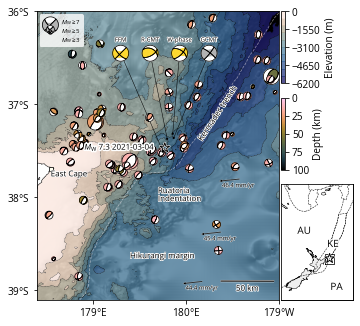

In [2]:
figuremods.fig1('../fig/fig1R1.pdf')

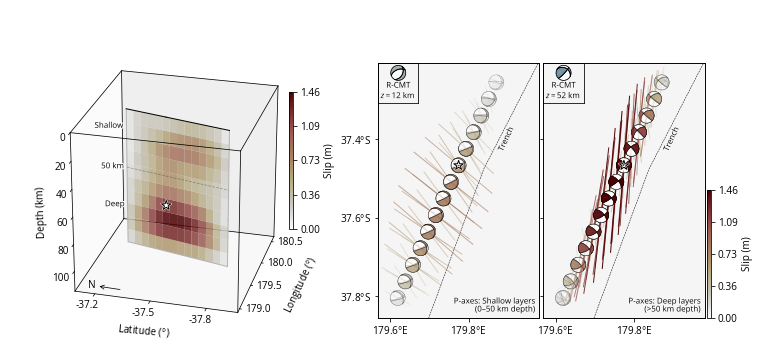

In [3]:
figuremods.fig2(figname='../fig/fig2.pdf', ptflag='P', j=13)

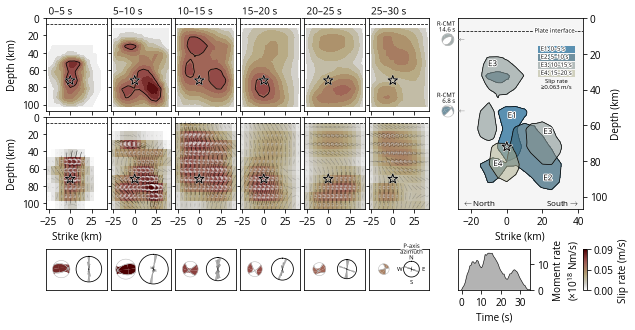

In [2]:
figuremods.fig3('../fig/fig3.pdf')

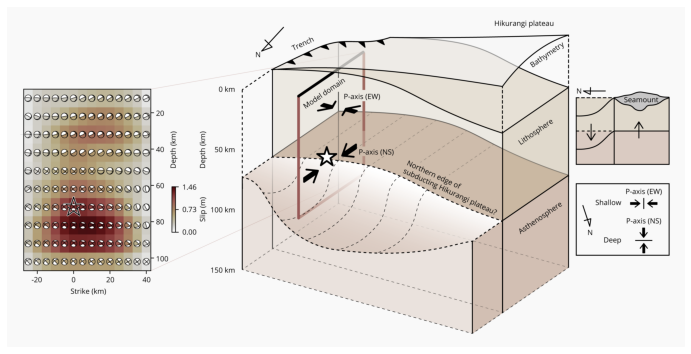

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(3, 3))
image = mpimg.imread('../fig/fig4R2.png')
_ax = fig.add_axes([0, 0, image.T.shape[1]*1e-3, image.T.shape[2]*1e-3])
_ax.imshow(image)
_ax.axis('off'); plt.show()

# Supplementary figures

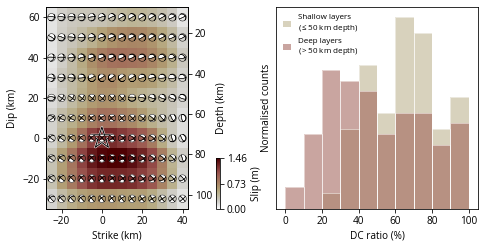

In [1]:
figuremods.dcpopulation('../fig/_dcpopulation.png')

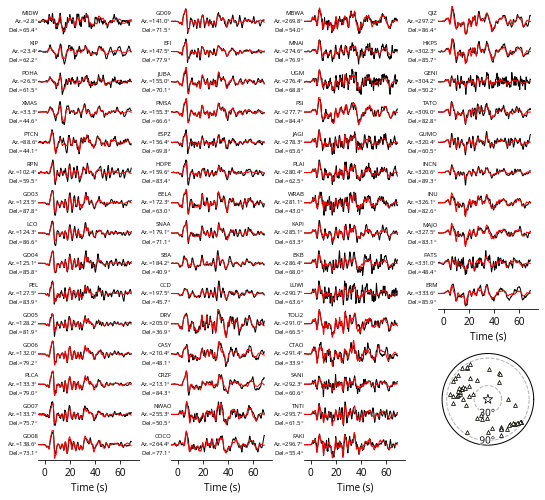

In [2]:
figuremods.fit('../fig/fit.png')

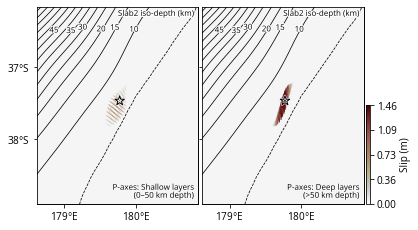

In [2]:
figuremods.slab2(figname='../fig/slab2.png', ptflag='P')

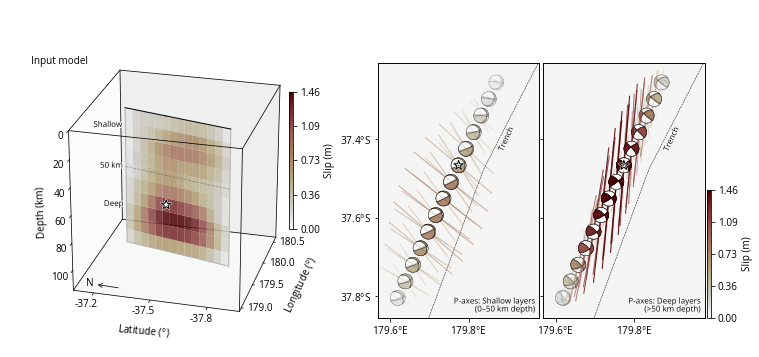

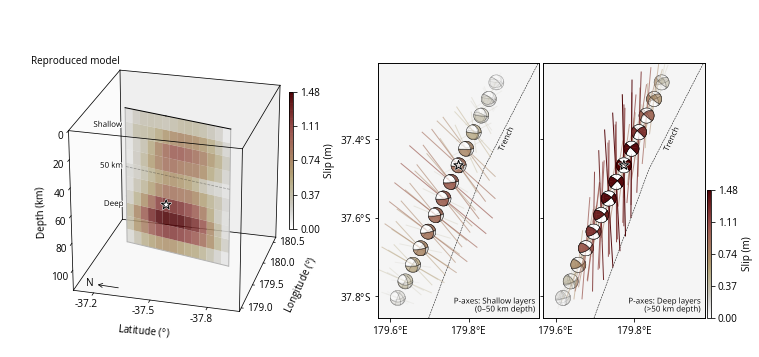

In [6]:
syninput, synoutput = '../fig/synFFMinput.png', '../fig/synFFMoutput.png'
figuremods.fig2(figname=syninput, ptflag='P', j=13, rcmtflag=0, synflag=1)
figuremods.fig2(figname=synoutput, ptflag='P', j=21, rcmtflag=0, synflag=1)
figuremods.figSynFFMmerge(figname='../fig/synFFM.png', inputimage=syninput, outputimage=synoutput)

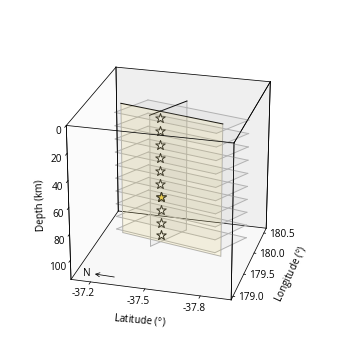

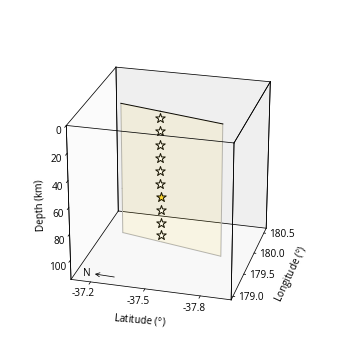

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


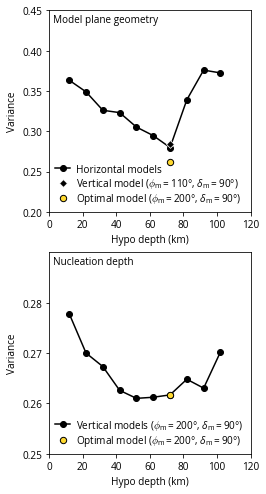

In [2]:
verticalFFMs, horizontalFFMs, varianceFFMs = '../fig/verticalFFMs.png', '../fig/horizontalFFMs.png', '../fig/varianceFFMs.png'
figuremods.geometryFFM(horizontalFFMs, j=13, geomflag='horizontal')
figuremods.geometryFFM(verticalFFMs, j=13, geomflag='vertical')
figuremods.varianceFFM(varianceFFMs)
figuremods.sensitivityMerge('../fig/sensitivity.png', horizontalFFMs, verticalFFMs, varianceFFMs)

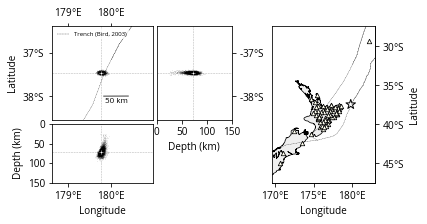

In [3]:
figuremods.reloc('../fig/relocR1.png')

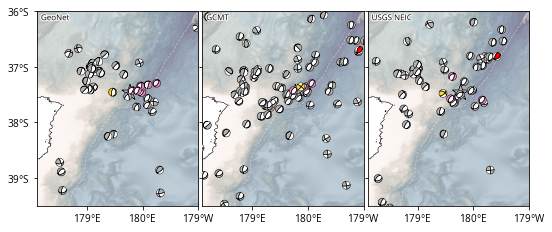

In [1]:
figuremods.seismicityFocalMech('../fig/seismicityFocalMechR1.png')

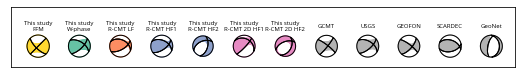

In [3]:
figuremods.mtcompilation('../fig/mtcompilation.png')

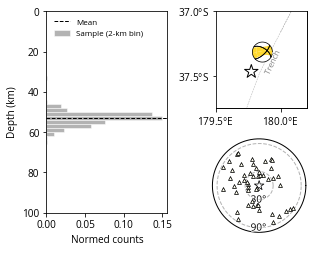

In [9]:
figuremods.wphase('../fig/wphase.png')

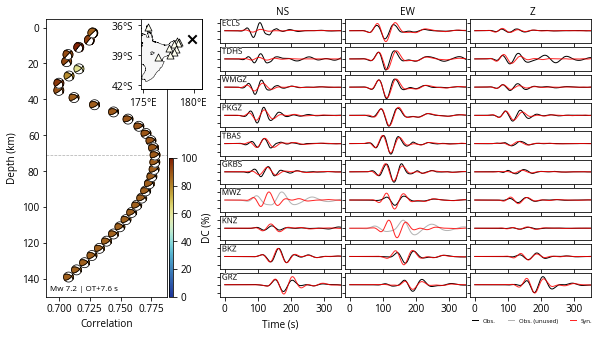

In [2]:
figuremods.rcmtLF('../fig/rcmtLF.png')

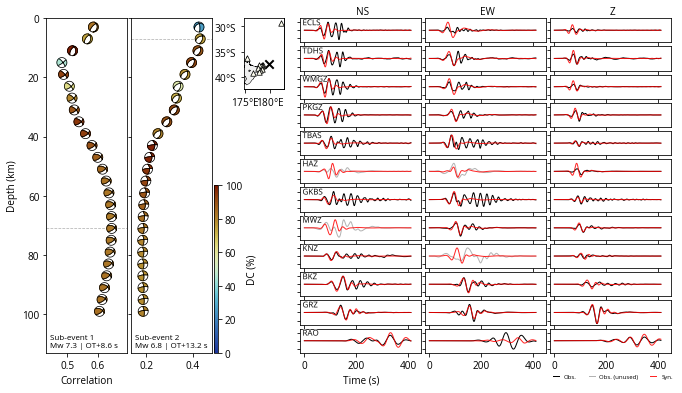

In [2]:
figuremods.rcmtHF('../fig/rcmtHFR1.png')

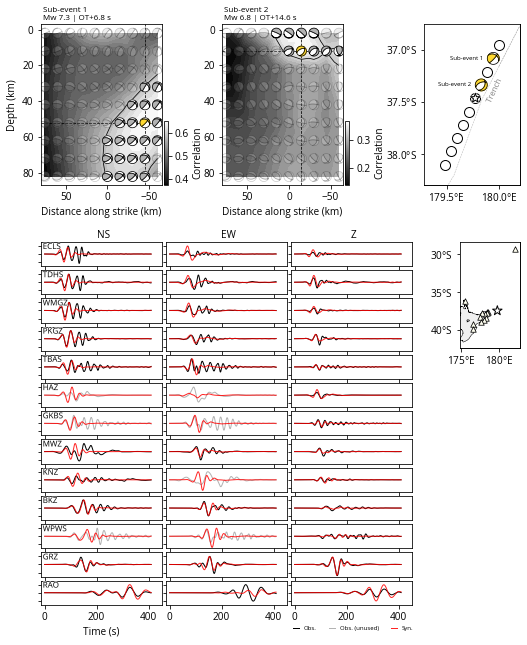

In [3]:
figuremods.rcmtHF2D('../fig/rcmtHF2DR1.png')

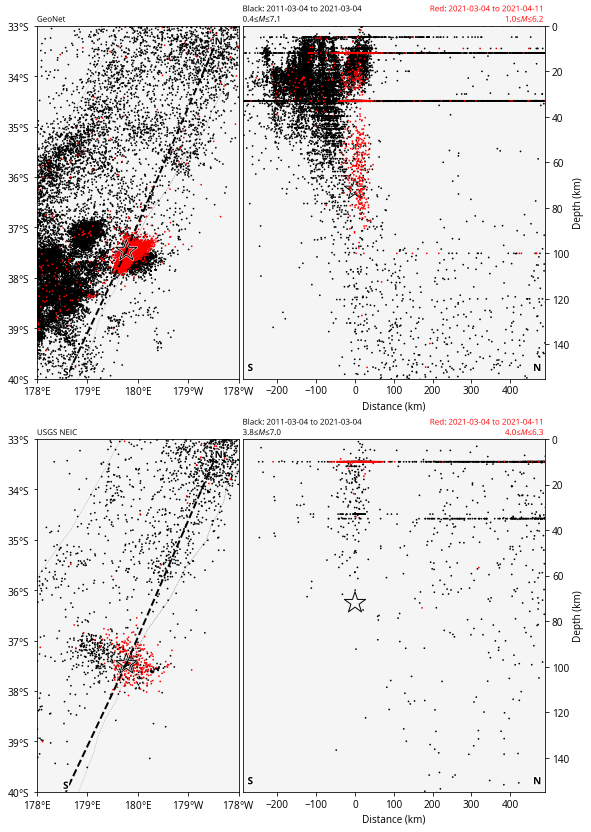

In [1]:
figuremods.seismicity_geonet_USGS('../fig/regularseismicityGeoNet.png')

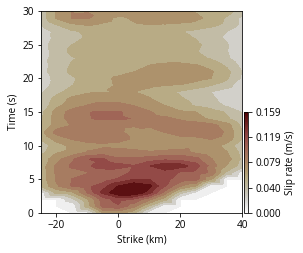

In [1]:
figuremods.timeevo_strike('../fig/timeevoStrike.png')

210514092034 211012023308


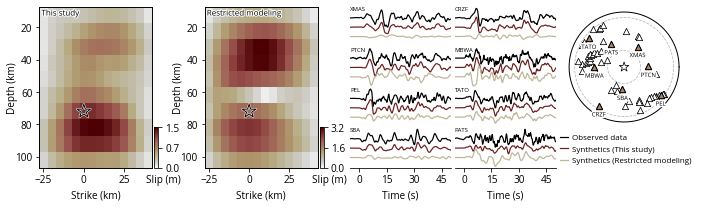

In [1]:
figuremods.comparison_fixed_nonfixed('../fig/comparison_fixed_nonfixed.png')

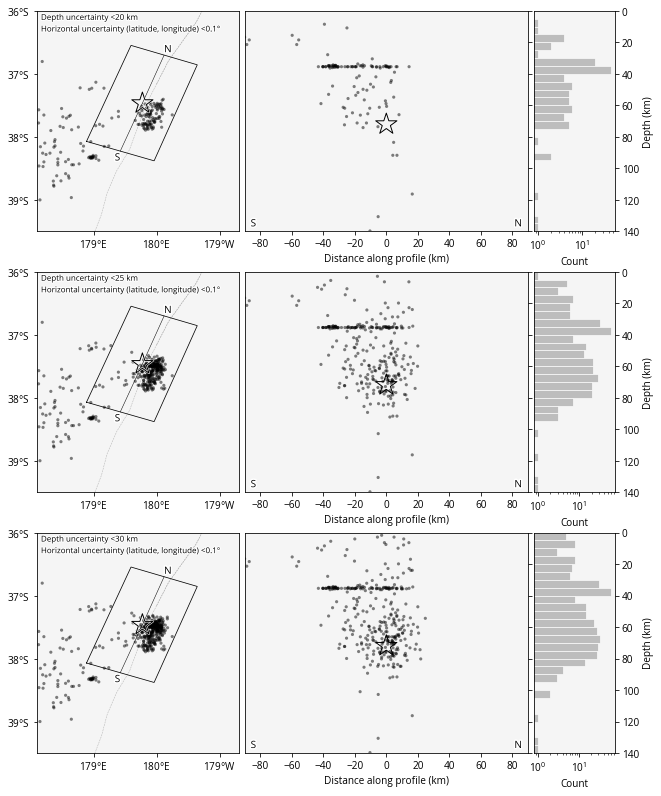

In [7]:
import figuremods
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from mpl_toolkits.basemap import Basemap
import numpy as np
import os
from cmcrameri import cm
import shapefile
import obspy
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
import utils
figsize = (5.6, 5.6)

# read reloc result
cat_nll = obspy.read_events("../materials/aftershockReloc/NLLOC_relocation_filt/NZ_nlloc_filt.xml", format="QUAKEML")
cat_nll

# add canvus
fig = plt.figure(figsize=figsize)

# interest region
lonmin, lonmax, latmin, latmax=178.1, 181.3, -39.5, -36

uncertain_flag = 'depth'
#uncertain_flag = 'horizontal'

# figure name
if uncertain_flag == 'depth':
    figname = '../fig/reloc_nll_aftershock_depth_uncertain.png'
    depth_uncertain_list = [20, 25, 30]
    horizontal_uncertain_list = [0.1]
else:
    figname = '../fig/reloc_nll_aftershock_horizontal_uncertain.png'
    depth_uncertain_list = [25]
    horizontal_uncertain_list = [0.07, 0.1, 0.2]

    
max_gap = 295
min_arrivals = 10
    
# uncertainty range
panelnum = 0
for max_depth_uncertainty_km in depth_uncertain_list: # km
    for max_latlon_uncertainty_degree in horizontal_uncertain_list: # degree

        # time range
        begintime = '2021-03-04T13:27' # this includes mainshock
        endtime = '2021-04-11T13:27'   # 1 week aftershock

        # filter results
        # write locations to file
        w = open('nll_locs.txt', 'w')
        for e in cat_nll:
            o = e.preferred_origin()
            lon = o.longitude
            lat = o.latitude
            if lon < 0: lon += 360
            lon_uncertain = o.longitude_errors.uncertainty
            lat_uncertain = o.latitude_errors.uncertainty
            depth_uncertain = o.depth_errors.uncertainty

            if lon >= lonmin and lon <= lonmax and lat >= latmin and lat <= latmax and \
            o.time >= begintime and o.time <= endtime and \
            lon_uncertain < max_latlon_uncertainty_degree and lat_uncertain < max_latlon_uncertainty_degree and \
            depth_uncertain*1e-3 < max_depth_uncertainty_km and \
            o.quality.azimuthal_gap < max_gap and \
            len(o.arrivals) >= min_arrivals:
                w.write("{} {} {}\n".format(o.longitude, o.latitude, o.depth*1e-3))
        w.close()

        # project results on reference rectangle
        !gmt project nll_locs.txt -A20 -C179.774/-37.466000000000001 -L-90/90k -W-50/50 -Q > nll_locs_proj.txt

        # data stogare
        datarootdir = '../materials/'

        # some origin information used in FFM
        model=np.loadtxt(datarootdir+'modellist.txt', dtype=int, usecols=0)
        j = 13 # optimum model
        model_para = utils.load_fort40(datarootdir+'model_'+str(model[j])+'/fort.40')
        elon, elat, edep = model_para.lon[0], model_para.lat[0], model_para.depth[0]

        # map region
        m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
                  rsphere=(6378137.00,6356752.3142),resolution='i',projection='cyl')
        x, y=m([lonmin, lonmax], [latmin, latmax])
        aspect=abs(max(x)-min(x))/abs(max(y)-min(y))

        # load data
        lon, lat, dep = np.loadtxt('nll_locs.txt', unpack=True)
        for n in range(len(lon)):
            if lon[n] < 0: lon[n] += 360
        x_proj, y_proj, z_proj, lon_proj, lat_proj = np.loadtxt('nll_locs_proj.txt', usecols=(3,4,2,0,1), unpack=True)
        for n in range(len(lon_proj)):
            if lon_proj[n] < 0: lon_proj[n] += 360

        # add axis for map
        if panelnum == 0:
            axpxloc = 0.1
            axpyloc = 0.1
        else:
            axp = ax.get_position()
            axpxloc = axp.x0
            axpyloc = axp.y0-axp.height-0.1

        axpwidth = 0.5
        mapheight=axpwidth/aspect
        ax=fig.add_axes([axpxloc, axpyloc, axpwidth, mapheight])
        axp = ax.get_position()
        fig.text(axp.x0+0.01, axp.y1-0.01, 
                 'Depth uncertainty <'+str(max_depth_uncertainty_km)+' km\n'+\
                 'Horizontal uncertainty (latitude, longitude) <'+str(max_latlon_uncertainty_degree)+'$\degree$',
                 path_effects=[path_effects.Stroke(linewidth=2, foreground='w', alpha=1), path_effects.Normal()],
                 fontsize=8, va='top')

        # add axis for cross section
        aspect = 140/180
        axp=ax.get_position()
        axcross=fig.add_axes([axp.x1+0.015, axp.y0, axp.height/aspect, axp.height])
        axcross.set(xlim=[-90, 90], ylim=[0, 140], facecolor='whitesmoke', yticklabels=[], xlabel='Distance along profile (km)')
        axcross.yaxis.set_ticks_position('right')
        axcross.yaxis.set_label_position('right')
        axcross.invert_yaxis()
        axp = axcross.get_position()
        for x, y, label, ha in zip([axp.x0+0.015, axp.x1-0.015], [axp.y0+0.005, axp.y0+0.005], ['S', 'N'], ['left', 'right']):
            fig.text(x, y, label, ha=ha, va='bottom', color='k', fontweight='normal',
                   path_effects=[path_effects.Stroke(linewidth=3, foreground='w', alpha=1), path_effects.Normal()])

        # add axis for histogram
        axp=axcross.get_position()
        axhist=fig.add_axes([axp.x1+0.015, axp.y0, 0.2, axp.height])
        axhist.set(ylim=[0, 140], xlabel='Count', ylabel='Depth (km)', xscale='log', facecolor='whitesmoke')
        axhist.yaxis.set_ticks_position('right')
        axhist.yaxis.set_label_position('right')
        axhist.invert_yaxis()


        # draw basic information
        x, y = m(model_para.lon[0], model_para.lat[0])
        ax.scatter(x, y, s=500, marker='*', facecolor='none', edgecolor='k', alpha=1, lw=1, zorder=10, label='Relocated epicentre (This study)',
                  path_effects=[path_effects.Stroke(linewidth=2, foreground='w', alpha=1), path_effects.Normal()])
        ax2 = utils.mapTicksBasemap(fig,m,ax,1,1,lonmin,lonmax,latmin,latmax,0)
        ax2.set_facecolor('whitesmoke')
        src = shapefile.Reader(datarootdir+'work/tectonicplates/PB2002_boundaries.shp')
        for tmp in src.shapeRecords():
            x = [i[0] for i in tmp.shape.points[:]]
            y = [i[1] for i in tmp.shape.points[:]]
            for n in range(len(x)):
                if x[n] < 0: x[n] = x[n] + 360
            x, y = m(x, y)
            ax.plot(x, y, color='C7', lw=0.5, linestyle='--', zorder=0)

        # draw filter rectangle used for cross section
        lonbound = []
        latbound = []
        for pm, label, va, ha, labelyshift in zip([-90, 90], ['S', 'N'], ['top', 'bottom'], ['right', 'left'], [-0.02, 0]):
            tmp = geod.Direct(elat, elon, 20, pm*1e3)
            if tmp['lon2'] < 0: tmp['lon2'] += 360
            x0, y0 = m(tmp['lon1'], tmp['lat1'])
            x1, y1 = m(tmp['lon2'], tmp['lat2'])
            ax.plot([x0, x1], [y0, y1], color='k', solid_joinstyle='miter', lw=0.5, zorder=0)
            ax.text(x1, y1+labelyshift, label, va=va, ha=ha, color='k', fontweight='normal',
                       path_effects=[path_effects.Stroke(linewidth=3, foreground='w', alpha=1), path_effects.Normal()])
            for pm1 in [-50, 50]: 
                tmp = geod.Direct(elat, elon, 20, pm*1e3)
                if pm < 0:
                    tmp1 = geod.Direct(tmp['lat2'], tmp['lon2'], 110, pm1*1e3)
                else:
                    tmp1 = geod.Direct(tmp['lat2'], tmp['lon2'], 110, -1*pm1*1e3)
                if tmp1['lon1'] < 0: tmp1['lon1'] += 360
                if tmp1['lon2'] < 0: tmp1['lon2'] += 360
                lonbound.append(tmp1['lon2'])
                latbound.append(tmp1['lat2'])
        latbound.append(latbound[0])
        lonbound.append(lonbound[0])
        x, y = m(lonbound, latbound)
        ax.plot(x, y, color='k', solid_joinstyle='miter', lw=0.75, zorder=0)

        # draw all the relocated aftershock
        x, y = m(lon, lat)
        ax.scatter(x, y, facecolor='k', edgecolor='none', s=10, alpha=0.5)

        # draw selected relocated aftershock
        x, y = m(lon_proj, lat_proj)
        #ax.scatter(x, y, facecolor='r', edgecolor='none', s=10, alpha=0.5)

        # draw cross section
        axcross.scatter(x_proj, z_proj, facecolor='k', edgecolor='none', s=10, alpha=0.5)
        axcross.scatter(0, edep, s=500, marker='*', facecolor='none', edgecolor='k', alpha=1, lw=1, zorder=0, label='Relocated epicentre (This study)',
                      path_effects=[path_effects.Stroke(linewidth=2, foreground='w', alpha=1), path_effects.Normal()])

        # draw histogram
        bins = np.arange(0, 1000, 5)
        axhist.hist(z_proj, bins=bins, orientation='horizontal', facecolor='C7', alpha=0.85, edgecolor='w', lw=0.75)


        panelnum += 1

plt.savefig(figname, bbox_inches="tight", pad_inches=0.1, dpi=300, facecolor='w')
plt.show()